<a href="https://colab.research.google.com/github/confeliz/2024_mirae_master/blob/main/2%EC%9D%BC%EC%B0%A8_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88_%EC%99%84%EC%84%B1_hj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2일차-탐색적데이터분석

## (코랩)한글 폰트 지정
- 아래 코드 실행 후  
- **런타임 > 세션 다시 시작** 메뉴 실행하기

In [74]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
plt.rc('font', family='NanumBarunGothic')        # 방법1
plt.rcParams['font.family'] = 'NanumBarunGothic' # 방법2
plt.rcParams['figure.figsize'] = (6, 4)  # 인치(inch)

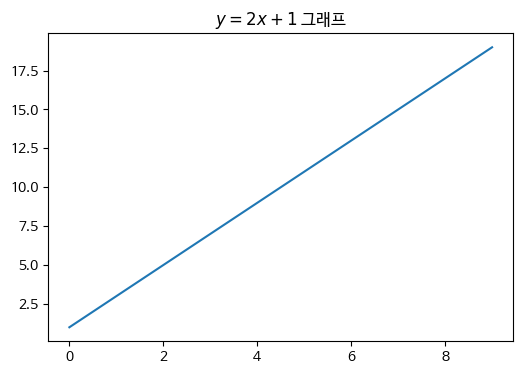

In [3]:
x = list(range(0, 10))
y = [2*i + 1 for i in x]
plt.plot(x, y)
plt.title('$y=2x+1$ 그래프')
plt.show()


## 1.데이터 분석 이해하기

## 2.데이터 분석 라이브러리

### [PC에서 실행] 필요한 라이브러리 설치하기

In [ ]:
!pip install numpy    # 최초 한번만 실행하기

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
!pip install plotly

### 실습 : 라이브러리 버전 확인하기

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
import keras
print('python version: ', sys.version)
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('matplotlib version: ', plt.__version__)
print('seaborn version: ', sns.__version__)
print('tensorflow version: ', tf.__version__)
print('keras version: ', keras.__version__)

python version:  3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
pandas version:  2.2.2
numpy version:  1.26.4
matplotlib version:  3.7.1
seaborn version:  0.13.2
tensorflow version:  2.17.0
keras version:  3.4.1


### 2-1.**Numpy**
- numpy로 행렬 정의하기

In [4]:
# 배열 만들기
import numpy as np

arr = np.array([0,1,2,3,4,5,6,7,8,9]) # 1차원 배열
print(type(arr))
print(arr)

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# 배열 요소 합산하기
arr = np.array(range(20))
print(arr)
arr = arr.reshape((4,5))
print(arr)
print(f'전체 합계: {np.sum(arr)}')
print(f'세로축(행) 합계: {np.sum(arr, axis=0)}')
print(f'가로축(열) 합계: {np.sum(arr, axis=1)}')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
전체 합계: 190
세로축(행) 합계: [30 34 38 42 46]
가로축(열) 합계: [10 35 60 85]


- 이미지 처리는 numpy로 쉽게 처리할 수 있다.

In [ ]:
# opencv 라이브러리 설치하기
!pip install opencv_python

In [ ]:
import cv2
cv2.__version__

'4.10.0'

(425, 640, 3)
[240 236 231]


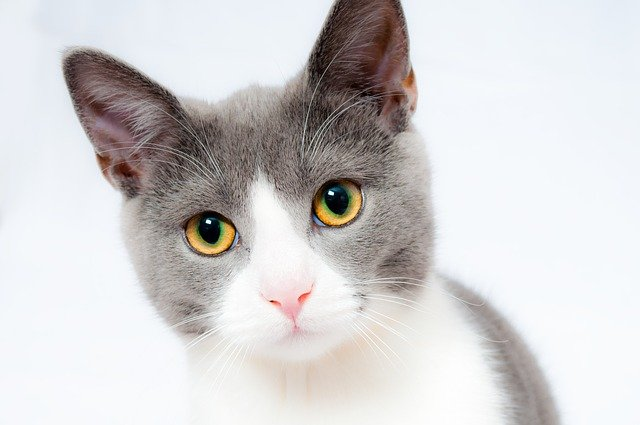

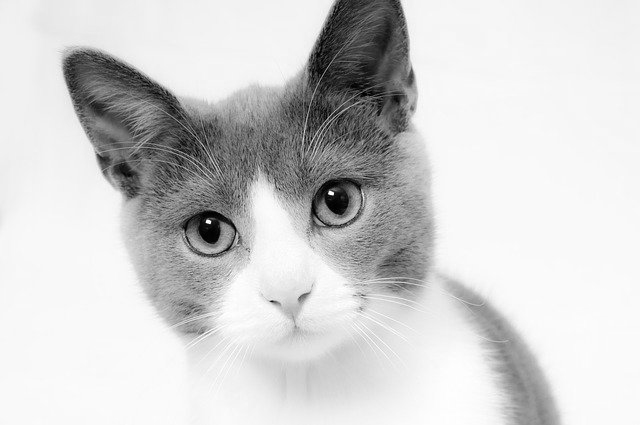

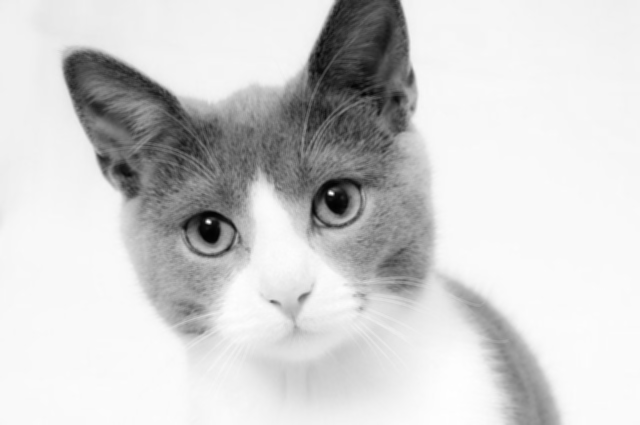

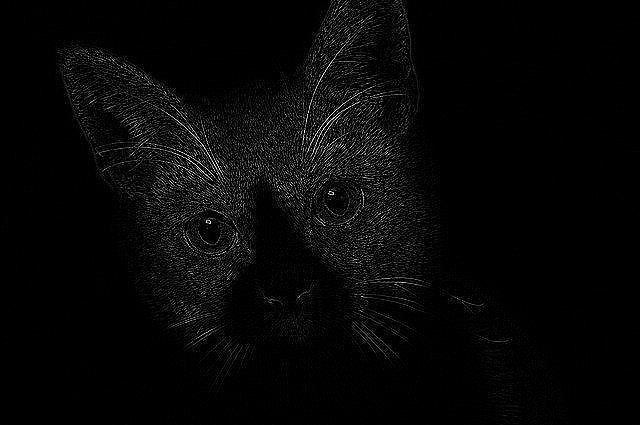

In [ ]:
import sys
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

color_image = cv2.imread('cat.jpg')
if color_image is None:
    print('이미지 파일 읽기 실패!.')
    sys.exit()

print(color_image.shape)
print(color_image[1,1])


# BGR 형식을 RGB로 변환 (OpenCV는 기본적으로 BGR 형식으로 이미지를 읽음)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
# 컬러 이미지를 흑백 이미지로 변환
gray_image = cv2.cvtColor(color_image_rgb, cv2.COLOR_BGR2GRAY)

# 이미지를 부드럽게 변환하기
mask = np.array([[1/9,1/9,1/9],
                [1/9,1/9,1/9],
                [1/9,1/9,1/9]])
# mask = np.ones((3,3), dtype=np.float64)/ 9.
blur_image = cv2.filter2D(gray_image, -1, mask) # 부드럽게


# 이미지를 날카롭게 변환하기
mask = np.array([[0,-1,0],
                [-1,4,-1],
                [0,-1,0]])
sharp_image = cv2.filter2D(gray_image, -1, mask) # 날카롭게

# 이미지 출력하기
cv2_imshow(color_image)   #cv2.imshow('title', color_image)
cv2_imshow(gray_image)    #cv2.imshow('title', gray_image)
cv2_imshow(blur_image)    #cv2.imshow('title', blur_image)
cv2_imshow(sharp_image)   #cv2.imshow('title', sharp_image)

cv2.waitKey()             # 키가 눌려질때까지 기다리기
cv2.destroyAllWindows()

# 윈도우에서 이미지 확인하는 코드 사용방법
# cv2.imshow("title", image)
# cv2.waitKey()
# cv2.destroyAllWindows()

-----------

### 2-2.**Pandas**
- Pandas로 DataFrame 정의하기

In [ ]:
# 2차원 표(DataFrame) 형태로 만들기
import pandas as pd

df = pd.DataFrame([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(type(df))
print(df.index)
print(df.values)
print(df.columns)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=3, step=1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
RangeIndex(start=0, stop=3, step=1)


,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


Ctrl + / ==> 해당범위 전체 주석처리

- Pandas에서 파일 읽어오기

In [8]:
# TXT 파일 읽어오기
import pandas as pd

df = pd.read_table('./book.txt')

# 컬럼 제목 넣기: 방법1
#df = pd.read_table('./book.txt', sep=',',
#               names = ['제목','영어제목','저자','국적','출판년도'])

# 컬럼 제목 넣기: 방법2
df = pd.read_table('./book.txt', sep=',', header=None)
df.columns = ['제목','영어제목','저자','국적','출판년도']

df.head(3)

,제목,영어제목,저자,국적,출판년도
0,두 도시 이야기,A Tale of Two Cities,찰스 디킨스,영어,1859
1,어린 왕자,Le Petit Prince,앙투안 드 생텍쥐페리,프랑스어,1943
2,반지의 제왕,The Lord of the Rings,J. R. R. 톨킨,영어,1954 ~ 1955


In [ ]:
# CSV 파일 읽어오기
import pandas as pd

file = './data.csv'
df = pd.read_csv(file, encoding='CP949', engine='python')
print(type(df))
df.head(3)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),일최다강수량(mm),평균풍속(m/s),최대풍속(m/s),합계 일조시간(hr),최심적설(cm),평균지면온도(°C)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,0.0,2.1,13.0,218.6,NaN,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.0,2.2,10.0,236.5,1.8,NaN
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,3.3,2.1,10.3,223.7,0.0,NaN


In [26]:
#라이브러리 설치 :  EXCEL 파일 읽기 위해 필요
!pip install openpyxl

In [10]:
# EXCEL 파일 읽어오기
import pandas as pd

# 전체 시트 가져오기
# df = pd.read_excel('./인구밀도_인구주택총조사기준.xlsx', sheet_name=None)  # 전체시트
# 특정 시트 가져오기
df = pd.read_excel('./인구밀도_인구주택총조사기준.xlsx', sheet_name="데이터")

df         # 시트가 여러개 일 경우 딕셔너리 형태로 나타난다.
# df['전체'] # 특정 시트를 지정할 경우 DataFrame 구조로 나타낸다.

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정구역별,2021,2022,2023
0,전국,515.2,514.6,515.4
1,서울특별시,15650.1,15560.7,15506.4
2,부산광역시,4316.4,4272.8,4252.0
3,대구광역시,2702.2,2673.7,1586.7
4,인천광역시,2772.8,2801.3,2835.7
5,광주광역시,2944.0,2931.9,2908.5
6,대전광역시,2742.8,2730.7,2724.0
7,울산광역시,1055.0,1044.9,1042.0
8,세종특별자치시,787.7,822.9,830.7
9,경기도,1338.9,1344.9,1354.5


In [11]:
df['2022']


,2022
0,514.6
1,15560.7
2,4272.8
3,2673.7
4,2801.3
5,2931.9
6,2730.7
7,1044.9
8,822.9
9,1344.9


In [13]:
df.shape

(18, 4)

In [15]:
df.index
df.values
df.columns

Index(['행정구역별', '2021', '2022', '2023'], dtype='object')

In [17]:
#기초정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   18 non-null     object 
 1   2021    18 non-null     float64
 2   2022    18 non-null     float64
 3   2023    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [18]:
#기술통계정보
df.describe() #숫자 데이터 컬럼에 대해서만 보여줌

,2021,2022,2023
count,18.000000,18.000000,18.000000
mean,2032.211111,2025.116667,1962.027778
std,3635.094546,3612.959623,3597.372848
min,90.400000,90.800000,90.800000
25%,232.000000,231.325000,233.375000
50%,651.450000,668.750000,673.050000
75%,2732.650000,2716.450000,2439.675000
max,15650.100000,15560.700000,15506.400000


In [19]:
df.describe(include='all') #문자 데이터 컬럼에 대해서도 보여줌

,행정구역별,2021,2022,2023
count,18,18.000000,18.000000,18.000000
unique,18,NaN,NaN,NaN
top,전국,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,2032.211111,2025.116667,1962.027778
std,NaN,3635.094546,3612.959623,3597.372848
min,NaN,90.400000,90.800000,90.800000
25%,NaN,232.000000,231.325000,233.375000
50%,NaN,651.450000,668.750000,673.050000
75%,NaN,2732.650000,2716.450000,2439.675000


In [20]:
df.corr(numeric_only=True) #상관계수

,2021,2022,2023
2021,1.000000,0.999991,0.997382
2022,0.999991,1.000000,0.997486
2023,0.997382,0.997486,1.000000


<Axes: >

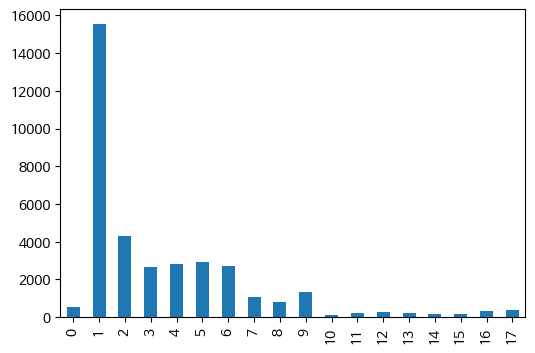

In [ ]:
df['2022'].plot(kind='bar')

<Axes: >

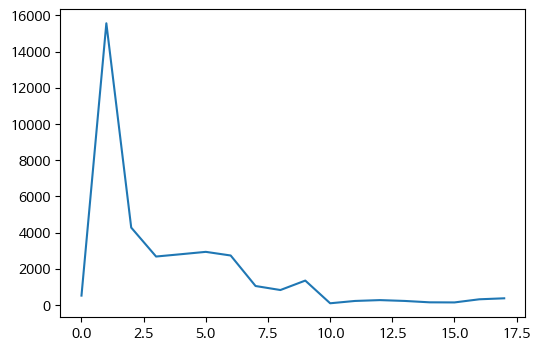

In [12]:
df['2022'].plot(kind='line')

In [ ]:
# Remote URL의 CSV 데이터 Pandas DataFrame으로 나타내기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header=None) # 첫번째 행 컬럼으로 인식 안하도록
df.head()

### Pandas에서 파일 저장하기

In [ ]:
# 사이킷런 머신러닝 라이브러리 설치하기
!pip install scikit-learn

In [9]:
# 사이킷런 빌트인 데이터셋(sklearn.datasets): 붓꽃
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']        # iris.target
df['target_name'] = iris.target_names[iris.target]

file = './sample_data/my_iris.csv'
df.to_csv(file, index=False)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### [실습문제] 공공데이터 다운받고 DataFrame표로 나타내기

- 데이터 위치: https://kosis.kr/statisticsList/statisticsListIndex.do?parentId=A.1&vwcd=MT_ZTITLE&menuId=M_01_01&outLink=Y&entrType=#content-group

In [31]:
import pandas as pd

# CSV 파일 읽기
file = './인구밀도_인구주택총조사기준___시도_20241021111756.xlsx'
df = pd.read_excel(file)

# 데이터 전처리하기
# # (첫번째 행: 전국 행 삭제하기)
df.drop([0], axis=0, inplace=True)   # 인덱스 0번 행 삭제하기


# # DataFrame을 CSV 파일로 저장하기
# df.to_excel('./my_data.excel')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정구역별,2021,2022,2023
1,서울특별시,15650.1,15560.7,15506.4
2,부산광역시,4316.4,4272.8,4252.0
3,대구광역시,2702.2,2673.7,1586.7
4,인천광역시,2772.8,2801.3,2835.7
5,광주광역시,2944.0,2931.9,2908.5
6,대전광역시,2742.8,2730.7,2724.0
7,울산광역시,1055.0,1044.9,1042.0
8,세종특별자치시,787.7,822.9,830.7
9,경기도,1338.9,1344.9,1354.5
10,강원특별자치도,90.4,90.8,90.8


-----------

### 2-3. Matplotlib

- 맷플롯립(matplotlib) : 매트랩(matlab) 기능을 파이썬에서 그대로 사용하도록 하는 시각화 모듈
- MATLAB: 매스웍스에서 개발한 수치 해석 및 프로그래밍 환경을 제공하는 공학용 소프트웨어. 행렬을 기반으로 한 계산 기능을 지원하며 함수나 데이터를 그림으로 그리는 기능 및 프로그래밍을 통한 알고리즘 구현 등을 제공함
- 매트랩을 포장(wrapping)해서 맷플롯립을 지원
 - - import matplotlib.pyplot as plt
 <br><br>
- https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png
- https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

In [32]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
import matplotlib.pyplot as plt


# plt.rc('font', family='NanumGothic')        # for Colab
# plt.rc("font", family = "Malgun Gothic")        # for Win
# plt.rc('font', family='AppleGothic')            # for Mac
plt.rcParams['font.family'] = 'NanumGothic' # for Colab
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (5, 3)        # 그래프 크기(인치)
plt.rcParams['axes.unicode_minus'] = False     # 그래프 축에서 마이너스 표시

### matplotlib 사용

X축 값:  [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Y축 값:  [15, 7, 2, 10, 8, 5, 14, 9, 18, 8]


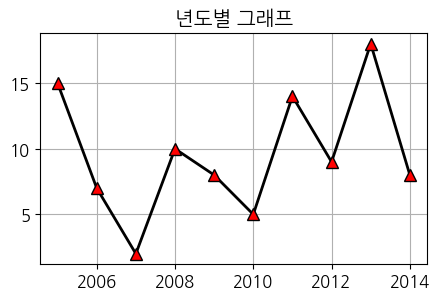

In [33]:
X = list(range(2005, 2015, 1))  # X좌표
Y = [15,7,2,10,8,5,14,9,18,8]   # Y좌표
print('X축 값: ', X)
print('Y축 값: ', Y)

# plt.plot(X, Y)  # 기본 선 그래프
# plt.plot(X, Y, linestyle='dashdot', color='r') # 빨간색 점선 그래프
plt.plot(X, Y, color='k', marker='^', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')
plt.grid(True)
plt.title('년도별 그래프')
plt.show()

#### 선그래프

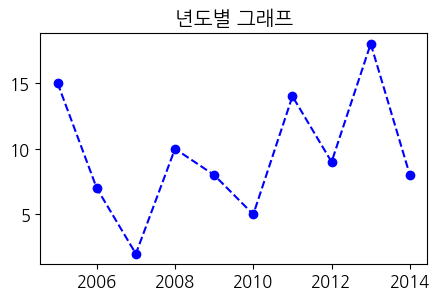

In [34]:
data    = [[15,7,2,10,8,5,14,9,18,8]]
columns = list(range(2005,2015,1))
index   = ['횟수']

df = pd.DataFrame(data, columns=columns, index=index)
df.columns.name = '연도'

x = df.columns    #x = df.columns
y = df.values[0]  #y = df.values[0]

plt.plot(x, y, 'o', linestyle='dashed', c='b')
plt.title('년도별 그래프')
plt.show()

### [실습] : 2개 선그래프 나타내기

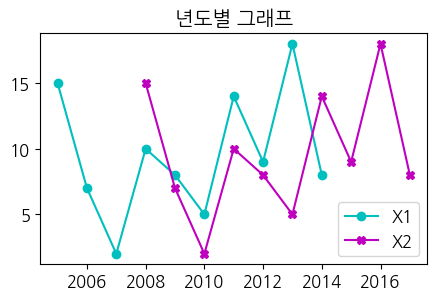

In [35]:
# X축, Y축 데이터
X1 = list(range(2005,2015,1))
X2 = list(range(2008,2018,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.plot(X1, Y, 'o', linestyle='solid', c='c', label='X1')     #선 그래프
plt.plot(X2, Y, 'X', linestyle='solid', c='m', label='X2')     #선 그래프
plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

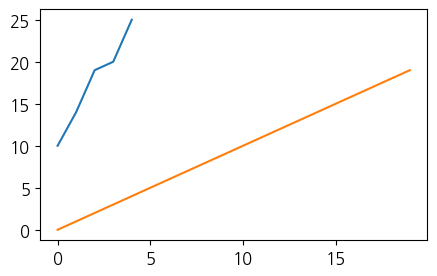

In [36]:
a = np.array([10,14,19,20,25])
plt.plot(a)

a2 = np.arange(20)
plt.plot(a2)

plt.show()

### 2차 방정식의 그래프 : f(x) = a*x^2 + b, 포물선 방정식

[-4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
  2.5  3.   3.5  4.   4.5]
[41.5 33.  25.5 19.  13.5  9.   5.5  3.   1.5  1.   1.5  3.   5.5  9.
 13.5 19.  25.5 33.  41.5]


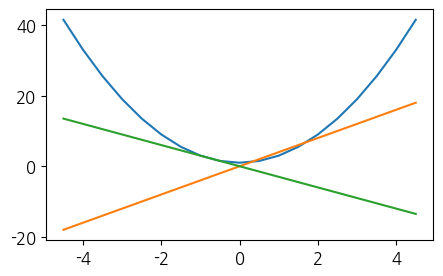

In [41]:
x = np.arange(-4.5,5,0.5)
y = 2*x**2+1
print(x)
print(y)

plt.plot(x, y)

plt.plot(x, 4*x)
plt.plot(x,-3*x)
plt.show()

#### 산점도

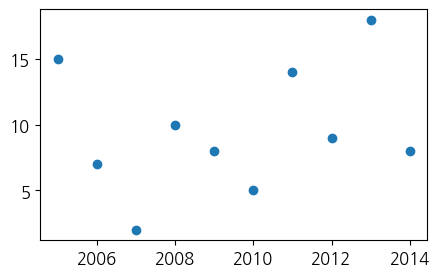

In [38]:
x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

plt.scatter(x, y)
plt.show()

- 점 크기 지정

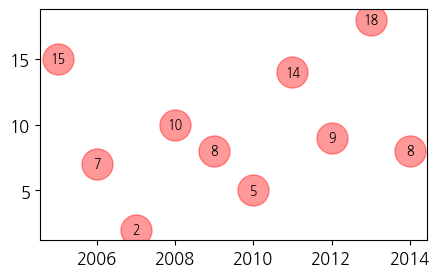

In [39]:
plt.scatter(x, y,  s=500, c='red', alpha=0.4)  # s:마커크기: 500, 컬러:red
for a, b in zip(x, y):
    plt.text(a, b, str(b), fontsize=9,
             horizontalalignment='center', verticalalignment='center')  # x,y좌표에 글자 넣기
plt.show()

- 색상, 투명도 지정

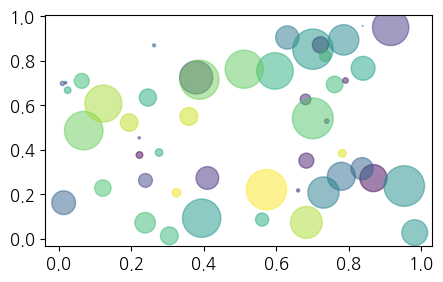

In [42]:
import numpy as np

# Fixing random state for reproducibility
np.random.seed(12345678)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

-------

#### 막대 그래프

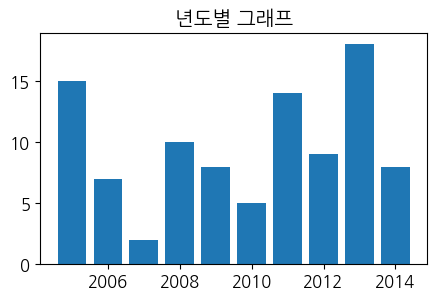

In [43]:
# X축, Y축 데이터
X = list(range(2005,2015,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X, Y)     # 막대 그래프
plt.grid(False)
plt.title('년도별 그래프')
plt.show()

- 가로 막대 그래프

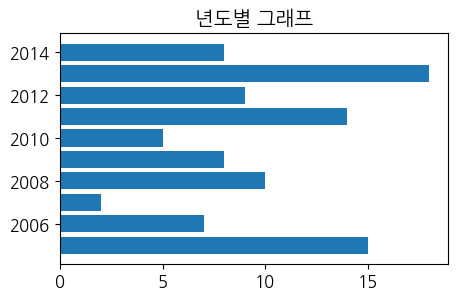

In [44]:
plt.barh(X, Y)     # 막대 그래프
plt.grid(False)
plt.title('년도별 그래프')
plt.show()

- 막대 색상 다르게 그리기

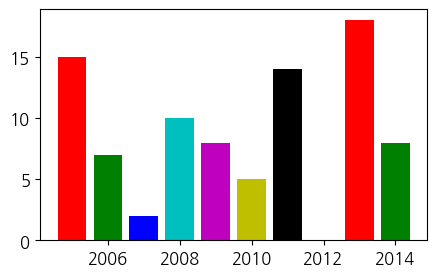

In [45]:
#그래프 색상 지정
colors = ['r','g','b','c','m','y','k','w']  # 기본색상  # Hexa코드 or CSS컬러사용
plt.bar(X, Y,color=colors)
plt.show()

- 막대 그래프 겹쳐 그리기

[2016, 2017, 2018, 2019, 2020, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


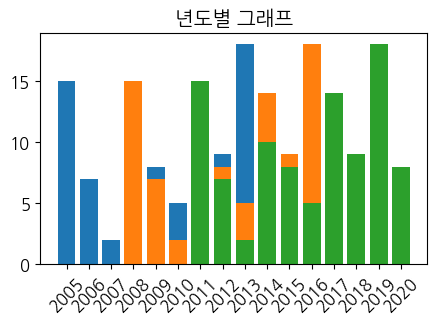

In [59]:
# X축, Y축 데이터
X1 = list(range(2005,2015,1))
X2 = [x+3 for x in X1]
X3 = [x+6 for x in X1]

Y = [15,7,2,10,8,5,14,9,18,8]
print(list(set(X1+X2+X3)))


plt.bar(X1, Y)     # 막대 그래프
plt.bar(X2, Y)     # 막대 그래프
plt.bar(X3, Y)     # 막대 그래프

plt.grid(False)
plt.title('년도별 그래프')
plt.xticks(list(set(X1+X2+X3)), rotation=45)           # x축 레이블 기울이기
plt.grid(False)
plt.show()

- 2개 막대 그래프

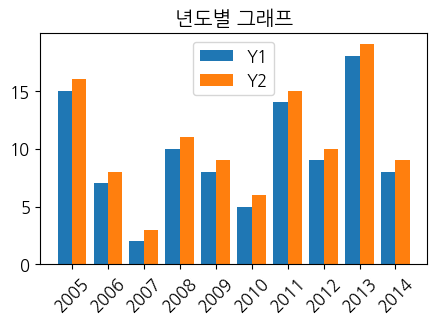

In [60]:
# X축, Y축 데이터
X = list(range(2005,2015,1))
Y1= [15,7,2,10,8,5,14,9,18,8]
Y2= [y+1 for y in Y1]
lable = X
X = np.arange(len(X))

plt.bar(X-0.2, Y1, width=0.4, label='Y1')     # 막대 그래프
plt.bar(X+0.2, Y2, width=0.4, label='Y2')     # 막대 그래프
plt.xticks(X, lable)

plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.xticks(rotation=45)
plt.show()

- 누적 막대 그래프

[0 1 2 3]


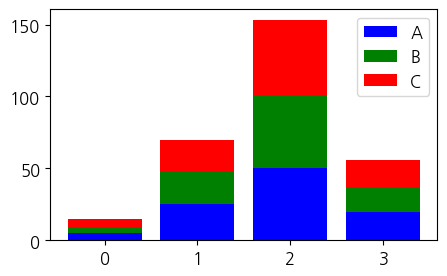

In [61]:
data = np.array([[5., 25., 50., 20.],
                 [4., 23., 51., 17],
                 [6., 22., 52., 19]])

color_list = ['b', 'g', 'r']
data_label = ["A","B","C"]
X = np.arange(data.shape[1])
print(X)

for i in range(3):
    plt.bar(X, data[i],
            bottom = np.sum(data[:i], axis=0),
            color = color_list[i],
            label=data_label[i])

plt.legend()
plt.show()

- 혼합 그래프

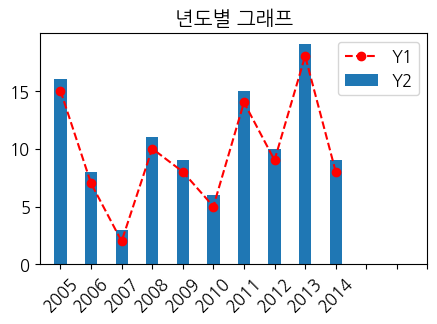

In [49]:
# X축, Y축 데이터
X = list(range(2005,2015,1))
Y1= [15,7,2,10,8,5,14,9,18,8]
Y2= [y+1 for y in Y1]

plt.plot(X, Y1, 'o', linestyle='dashed', c='r', label='Y1') # 선 그래프
plt.bar(X, Y2, width=0.4, label='Y2')     # 막대 그래프
plt.xticks(X, lable)

plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.xticks(list(set(X1+X2)), rotation=45)
plt.show()

-------

### 원(파이) 그래프

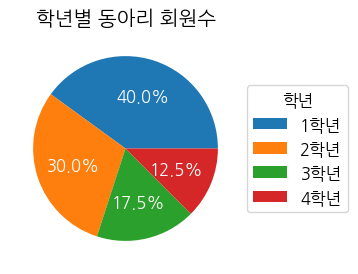

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

idx = ['1학년','2학년','3학년','4학년']
val = [16,12,7,5]
#per = [val[x]/sum(val) *100 for x in range(len(val))]

plt.pie(val, autopct='%1.1f%%',
              textprops=dict(color="w"))
plt.title("학년별 동아리 회원수")
plt.legend(idx, title='학년', loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



---



### 히스토그램(historgram)
데이터 분포 표현

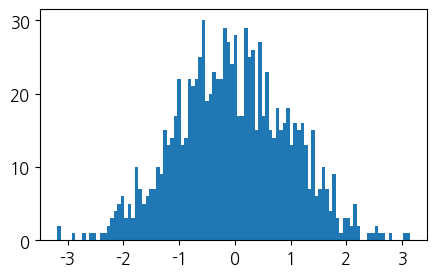

In [67]:
N = 1000
X = np.random.normal(size=N)

plt.hist(X,bins=100)
plt.show()

### 상자그림(boxplot)
- 상자그림(boxplot) : 사분위수를 시각화하여 데이터의 분포와 밀집 정도를 표현

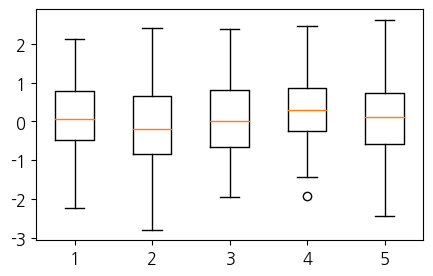

In [52]:
data = np.random.randn(100,5)
plt.boxplot(data)
plt.show()



---



### 2-4. Seaborn


- 시본(seaborn) : 맷플롯립을 바탕으로 다양한 함수 사용을 돕는 일종의 래퍼(wrapper) 모듈
- 맷플롯립과 동일한 결과물이 나오며, 작성 과정이 간단
- xticks 설정하지 않아도 각 축에 라벨 자동으로 생성
- 데이터프레임과 x, y에 해당하는 열 이름만 지정하면 됨
- sns.set_style("그래프 스타일") : darkgrid(default), whitegrid, dark, white, ticks
- sns.despine() : 축, 테두리 지정 : left, right, top, bottom # default

- 선 그래프

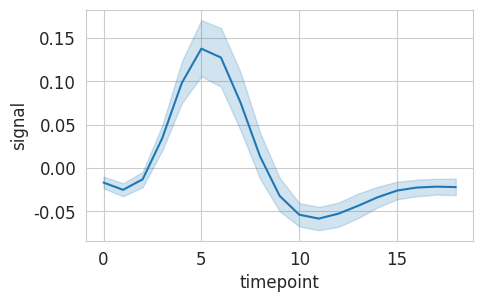

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                # (1)seaborn 모듈 호출

fmri = sns.load_dataset("fmri")       # (2) fmri 데이터셋 사용
sns.set_style("whitegrid")            # (3) 기본 스타일 적용
sns.lineplot(x="timepoint", y="signal", data=fmri) # (4) 선그래프 작성
plt.show()

fmri

In [70]:
fmri.sample(n=10, random_state=1)

,subject,timepoint,event,region,signal
806,s6,18,cue,parietal,0.019532
691,s5,15,cue,frontal,-0.019507
148,s5,8,stim,parietal,0.006805
676,s13,0,cue,parietal,-0.018394
156,s11,7,stim,parietal,0.254042
27,s1,17,stim,parietal,-0.038021
200,s11,4,stim,parietal,0.087175
262,s3,0,stim,parietal,-0.008576
94,s4,12,stim,parietal,-0.090036
339,s4,5,stim,frontal,0.455575


<Axes: xlabel='timepoint', ylabel='signal'>

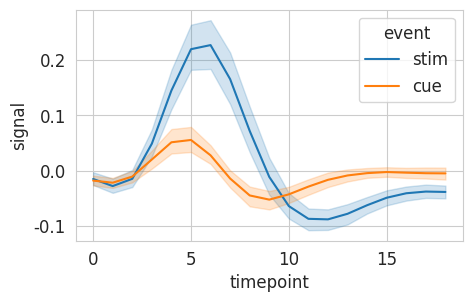

In [71]:
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

###[실습] seaborn의 lineplot 사용하기

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


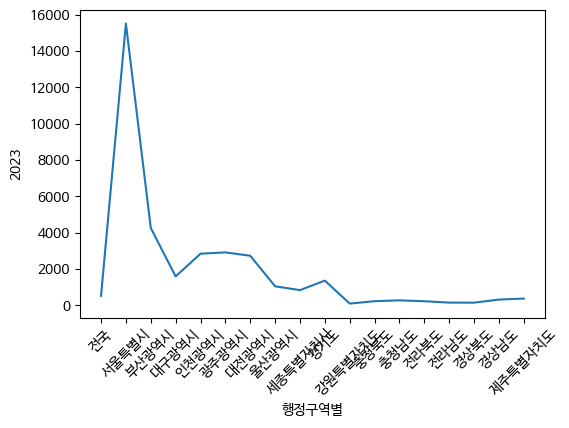

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumBarunGothic'

df = pd.read_excel('./인구밀도_인구주택총조사기준___시도_20241021111756.xlsx')
df.head()

sns.lineplot(data=df, x='행정구역별', y='2023')
plt.xticks(rotation=45)
plt.show()

- 회귀 그래프(regression plot)
    - 회귀식을 적용하여 선형회귀 추세선을 그래프에 함께 작성
    - 선형회귀 추세선 : 데이터를 기반으로 데이터의 x값 대비 y값 변화를 예측하는 직선
    - 함수 regplot 사용

<Axes: xlabel='total_bill', ylabel='tip'>

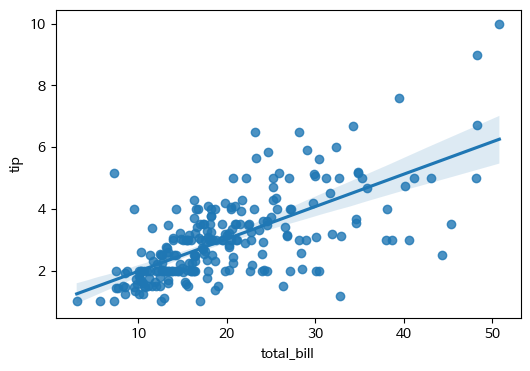

In [9]:
tips = sns.load_dataset("tips")
tips
sns.regplot(x="total_bill", y="tip", data=tips, x_ci=95)

<Axes: xlabel='2021', ylabel='2023'>

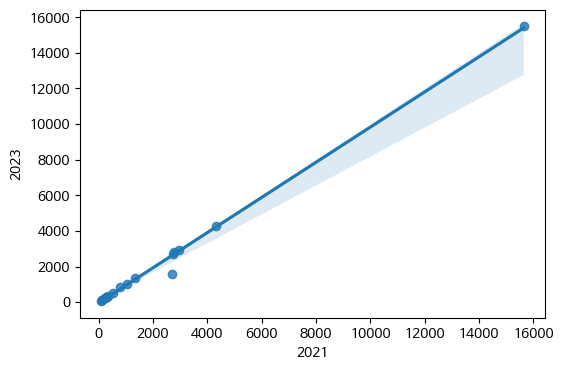

In [11]:
sns.regplot(x="2021", y="2023", data=df, x_ci=95)

- 산점도
    - 산점도(scatter plot) : x, y를 기준으로 데이터의 분포 표현
    - 함수 scatterplot 사용

<Axes: xlabel='total_bill', ylabel='tip'>

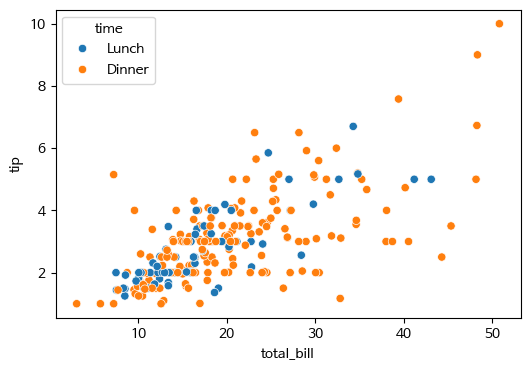

In [12]:
tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

- 비교 그래프(counter plot)
    -  범주형 데이터의 항목별 개수

<Axes: xlabel='smoker', ylabel='count'>

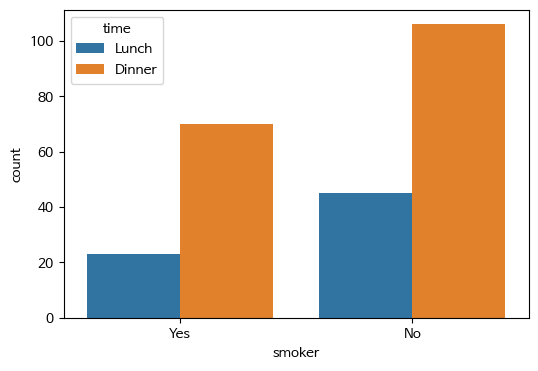

In [13]:
tips = sns.load_dataset("tips")
sns.countplot(x="smoker", hue="time", data=tips)

In [15]:
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- 히트맵(heatmap)
    - 수치형 데이터의 상관계수로 상관관계를 그려주는 그래프

In [16]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

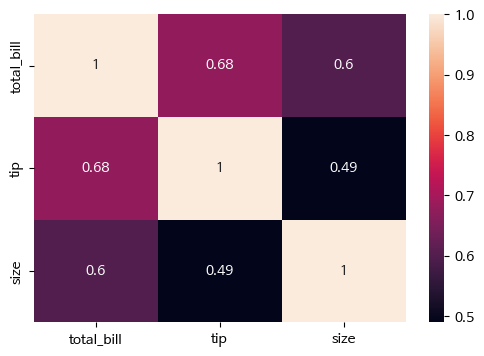

In [14]:
sns.heatmap(tips.corr(numeric_only=True), annot=True)


- 분포를 나타내는 그래프
    - 바이올린 플롯(violin plot) : 상자그림과 분포도를 한 번에 나타낼 수 있음

<Axes: xlabel='day', ylabel='total_bill'>

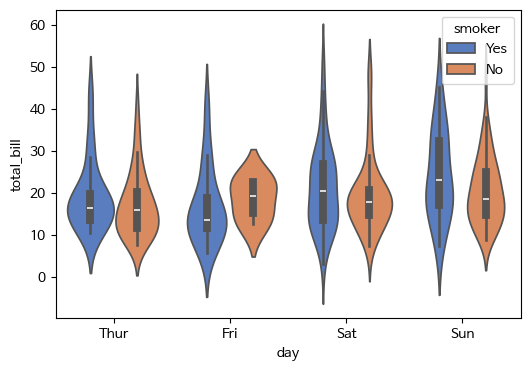

In [17]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted")

- 스웜 플롯(swarm plot)
    - 바이올린 플롯과 같은 형태에 산점도로 데이터 분포를 나타냄

<Axes: xlabel='day', ylabel='total_bill'>

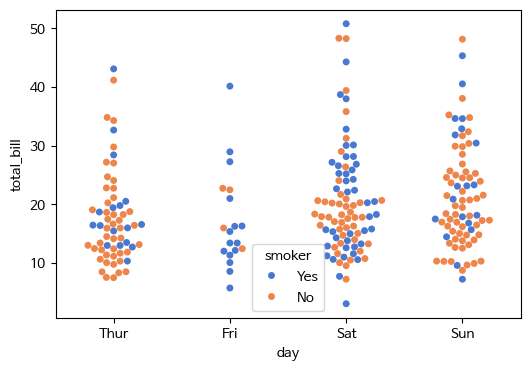

In [18]:
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

- 다양한 범주형 데이터를 나타내는 패싯그리드
    - 패싯그리드(FacetGrid) : 그래프의 틀만 제공하여 적당한 그래프를 그려주는 클래스
    - 그리드가 생성된 후 맵(map)을 사용하여 그래프 만듦
    - 각 FacetGrid에 있는 개별 그래프 영역에 그래프를 집어넣는 구조
    - 전체 데이터를 범주형 데이터의 다양한 관점에서 나눠서 볼 수 있음

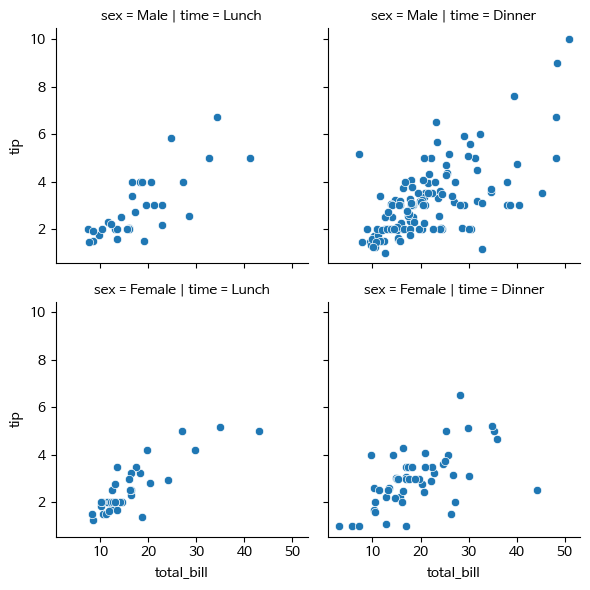

In [19]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

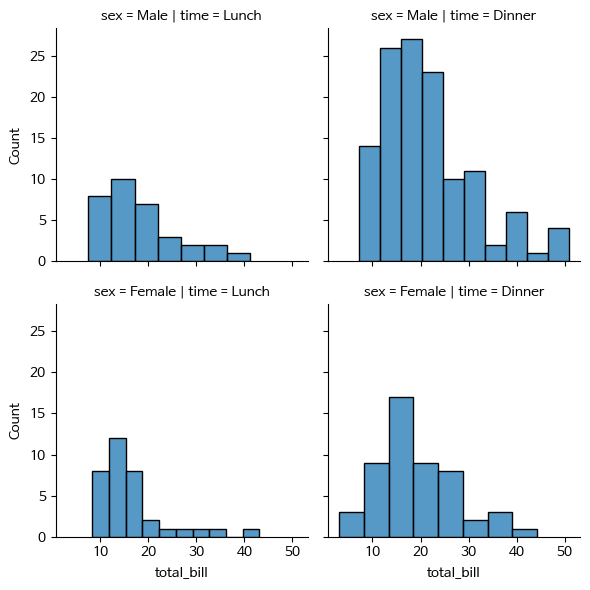

In [20]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

### 2-5. Plotly
- 플롯리(plotly) : 비즈니스 인텔리전스(Business Intelligence) 대시보드로 개발된 도구
- 맷플롯립이나 시본은 데이터 분석가들이 데이터의 형태나 분포를 살피기 위해 코드로 사용하는 도구
- 문법은 맷플롯립이나 시본과 유사
- 인터랙션 그래프를 지원
 * 생성된 그래프에 마우스 커서를 올리면 데이터를 볼 수 있음 (인터랙션 그래프)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)

In [23]:
import plotly.express as px

df = px.data.iris()     # iris는 판다스 데이터프레임
fig = px.scatter(df, x="sepal_width", y="sepal_length",
                width=500, height=300)
fig.show()

- 좌표 그래프(coordinates plot)
    - 데이터 간 관계를 표현(시본은 제공하지 않지만 플롯리에서 제공하는 기능)

In [26]:
df


,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [24]:
fig = px.parallel_coordinates(df, color="species_id",
        labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                color_continuous_scale=  px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

#### 샘플 데이터: 전세계 행복지수

In [31]:
import plotly.express as px

filename = './world-happiness-report-2021.csv'
happiness_data = pd.read_csv(filename)
#happiness_data
happiness = happiness_data.iloc[:,[0,1,2,6,7,8,9,10,11]]
happiness.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


- 가로막대형그래프 시각화 : 행복지수가 높거나, 낮은 국가

In [37]:
happiness.loc[ :'Ladder score']

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [42]:
happiness[happiness.loc[ :,'Ladder score'] >= 7.5]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673


<ipython-input-32-167da733b361>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Ladder score', ylabel='Country name'>

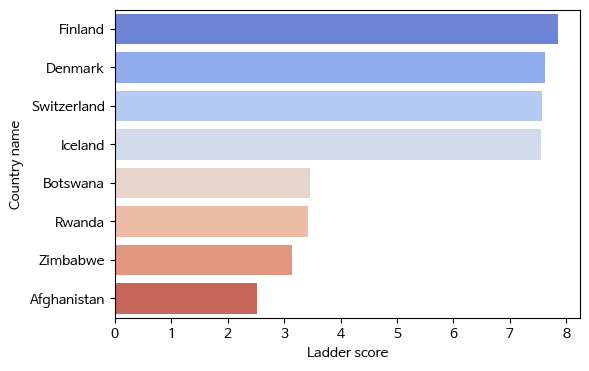

In [32]:
happinessFilter = happiness[(happiness.loc[:,'Ladder score']>=7.5) |\
                            (happiness.loc[:,'Ladder score']<=3.5)]
sns.barplot(x='Ladder score', y='Country name', data=happinessFilter, palette='coolwarm')

- 지역별 행복지수의 분포 시각화

<Axes: xlabel='Ladder score', ylabel='Regional indicator'>

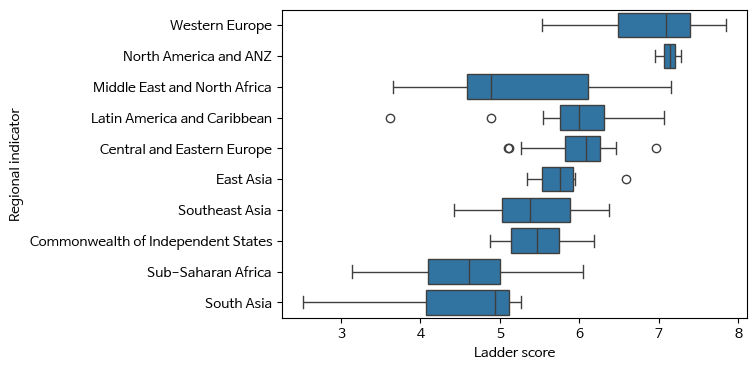

In [33]:
sns.boxplot(x='Ladder score', y='Regional indicator', data=happiness, orient='h')

- treemap 시각화
    - `px.treemap(data_frame=데이터프레임객체, path=[부모열,자식열], values=열속성, color=열속성)`
    * path는 [부모,자식] 순서로 작성
    * values는 사각형 크기가 나타내는 속성
    * color는 색상으로 표현하는 속성

In [43]:
fig = px.treemap(data_frame=happiness,
                 path=[px.Constant('world'),'Regional indicator','Country name'],
                 values='Ladder score',
                 color='Ladder score')
fig.update_layout(title='나라별 행복 지수', title_x=0.5, width=900, height=900)
fig.show()

- sunburst 시각화

In [44]:
fig = px.sunburst(data_frame=happiness,
                  path=['Regional indicator', 'Country name'],
                  values='Ladder score',
                  color='Ladder score')
fig.update_layout(title='나라별 행복 지수', title_x=0.5, width=1200, height=900)
fig.show()

----------